# Explore here

In [15]:
# Importamos las librerías necesarias
import pandas as pd

# URL del archivo CSV
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"

# Cargamos el conjunto de datos
sales_data = pd.read_csv(url)

# Visualizamos las primeras filas del conjunto de datos
print(sales_data.head())

print(sales_data.info())

print(sales_data.shape)
print(sales_data.describe())

                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None
(366, 2)
             sales
count   366.000000
mean    524.963968
std     275.089698
min      53.803211
25%     290.186822
50%     520.699468
75%     763.289263
max    1000.482785


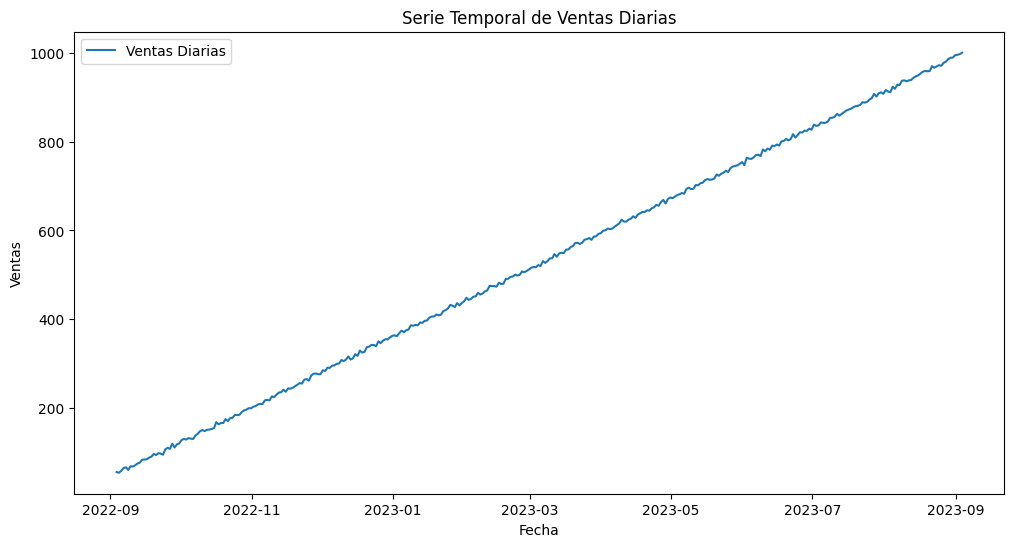

In [16]:
# Importamos las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Convertimos la columna 'date' a formato datetime, considerando tanto la fecha como la hora
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Establecemos la columna 'date' como índice
sales_data.set_index('date', inplace=True)

# Graficamos la serie temporal 
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_data.index, y=sales_data['sales'], label='Ventas Diarias')
plt.title('Serie Temporal de Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

El tensor es mensual. 

La tendencia sigue siendo la dirección general del comportamiento de las ventas. lAs ventas están aumentando con el tiempo.

Resultados de la prueba de Dickey-Fuller:
Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64


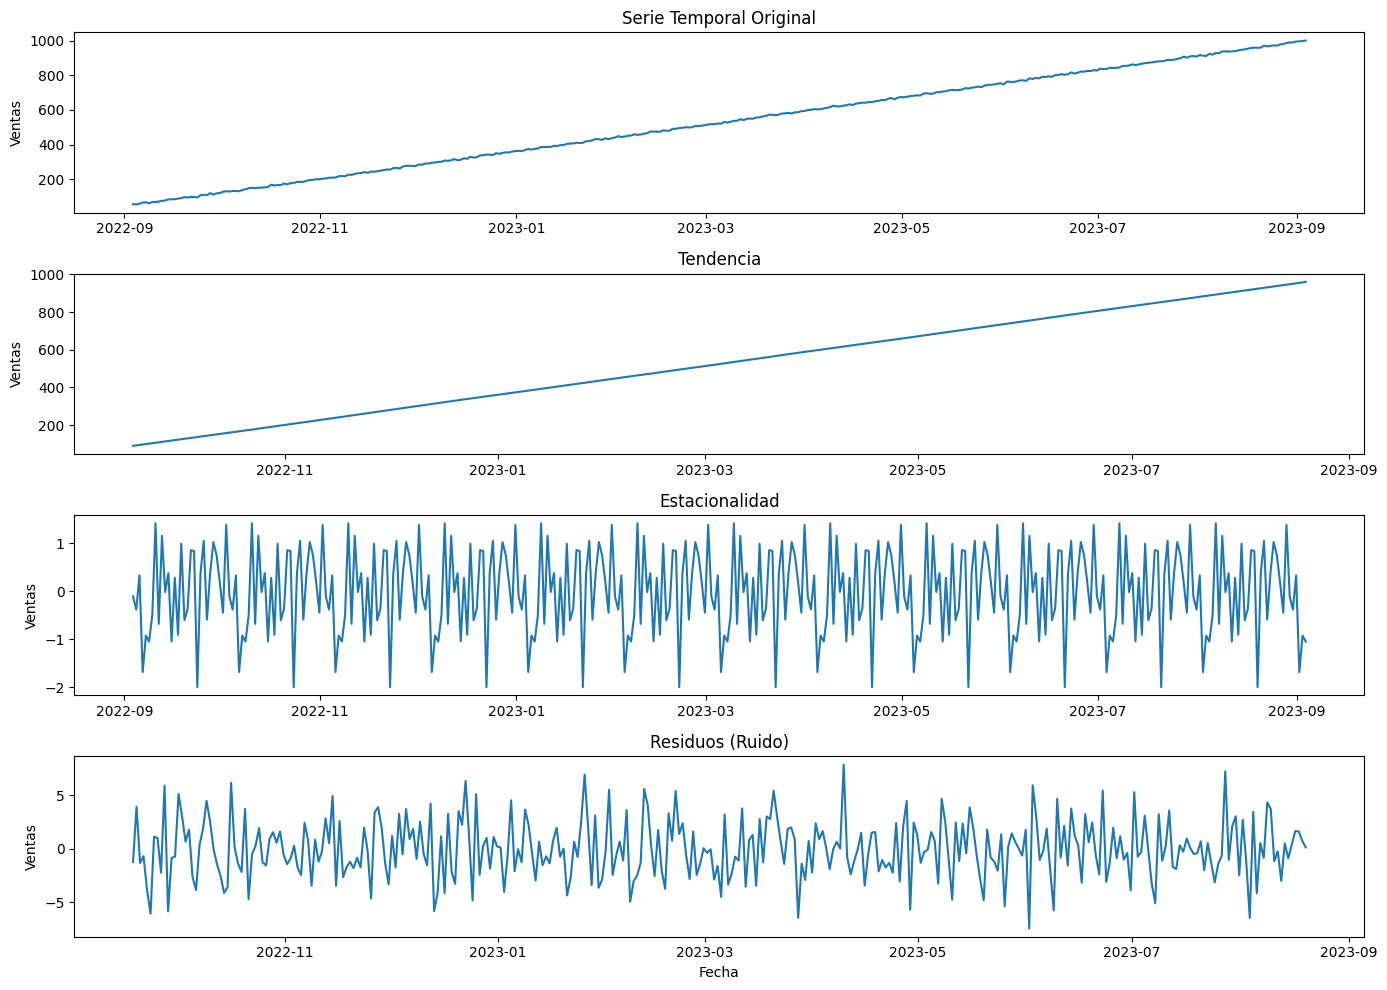

In [17]:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


# Descomposición de la serie temporal
decomposition = seasonal_decompose(sales_data['sales'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Graficamos la descomposición usando seaborn
plt.figure(figsize=(14, 10))

# Serie original
plt.subplot(4, 1, 1)
sns.lineplot(x=sales_data.index, y=sales_data['sales'])
plt.title('Serie Temporal Original')
plt.xlabel('')
plt.ylabel('Ventas')

# Tendencia
plt.subplot(4, 1, 2)
sns.lineplot(x=sales_data.index, y=trend)
plt.title('Tendencia')
plt.xlabel('')
plt.ylabel('Ventas')

# Función para la prueba de Dickey-Fuller
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

# Aplicamos la prueba de Dickey-Fuller
test_stationarity(sales_data['sales'])

# Estacionalidad
plt.subplot(4, 1, 3)
sns.lineplot(x=sales_data.index, y=seasonal)
plt.title('Estacionalidad')
plt.xlabel('')
plt.ylabel('Ventas')

# Residuos
plt.subplot(4, 1, 4)
sns.lineplot(x=sales_data.index, y=residual)
plt.title('Residuos (Ruido)')
plt.xlabel('Fecha')
plt.ylabel('Ventas')

plt.tight_layout()
plt.show()

In [ ]:
##Sigue sin funcionar la compatibilidad entre librerias. Por favor, arreglar.

In [18]:
from pmdarima import auto_arima

model = auto_arima(ts_stationary, seasonal = True, trace = True, m = 12)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

No consigo arreglar este problema de compatibilidades.